# Pymaceuticals Inc.
---

### Analysis

- The mean, median, variance, standard deviation, and sem of tumor volume were calculated after grouping the data by drug regimen. These statistics are used to compare the efficacy of the different drug regimens on decreasing tumor volume and a new dataframe for the statistics was created. Ramicane and Capomulin were the two most effective drug regimens because they have the lowest mean tumor volume as well as the lowest medians, variance, standard deviation, and sem. All of the other drug regimens were less effective and had similar statistics to one another. 
- When looking at the bar graphs, Capomulin and Ramicane have the most observed timepoints. This could be due to the fact that the researchers stopped recording timepoints when the drug stopped reducing tumor volume or the mice did not survive, which lead to less timepoints. The pie chart doesn't really give us much information to use because the number of male and female mice were about the same, so the results should not be skewed due to a difference in genetic makeup. We observed potential outliers for Capomulin, Ramicane, Infubinol, and Ceftamin and only found one outlier for Infubinol. The statistical analysis of Infubinol's efficacy could be skewed by this outlier because it is much lower than the mean and lower than the lower bound. The other three drug regimens should not have had their data skewed due to the lack of outliers. The next figure is a line plot of a random mouse treated with Capomulin. The mouse selected was mouse x401. Capomulin was an effective drug for this mouse because the tumor volume shrunk from 45 mm3 at day 0 to less than 30 mm3 at day 40. 
- Finally we look at the scatter plot of mouse weight vs. average tumor volume. When looking at the points on the graph it seems like there is a positive correlation between mouse weight and tumor volume. To confirm this assumption, a linear regression was done and the correlation coefficient was found. The correlation coefficient is 0.84, which indicates a strong positive correlation, confirming our assumption. A linear regression was done with the data to plot the line of best fit on the scatter plot along with the line's equation.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(study_results, mouse_metadata, on='Mouse ID', how='left')

# Display the data table for preview
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mice_number = len(merged_df['Mouse ID'].value_counts())
mice_number

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
non_unique = merged_df[merged_df.duplicated(subset=['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()
non_unique

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
g989_df = merged_df[merged_df['Mouse ID'] == 'g989']
g989_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = merged_df.set_index('Mouse ID').drop(index='g989').reset_index()
cleaned_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
len(cleaned_df['Mouse ID'].value_counts())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# drug_regimen = cleaned_df['Drug Regimen'].unique()
# drug_regimen_sorted = np.sort(drug_regimen)
tumor_volume_grouped = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)']
tumor_volume_mean = tumor_volume_grouped.mean()
tumor_volume_median = tumor_volume_grouped.median()
tumor_volume_variance = tumor_volume_grouped.var()
tumor_volume_stddev = tumor_volume_grouped.std()
tumor_volume_sem = tumor_volume_grouped.sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
regimen_first_df = pd.DataFrame(data={
    'Mean Tumor Volume': tumor_volume_mean, 
    'Median Tumor Volume': tumor_volume_median, 
    'Tumor Volume Variance': tumor_volume_variance, 
    'Tumor Volume Std. Dev.': tumor_volume_stddev, 
    'Tumor Volume Std. Err.': tumor_volume_sem, 
})
regimen_first_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
agg_data = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
# Using the aggregation method, produce the same summary statistics in a single line
regimen_agg_df = pd.DataFrame(agg_data)
# Added Tumor Volume (mm3) header like in starter file
regimen_agg_df.columns = pd.MultiIndex.from_product([['Tumor Volume (mm3)'], regimen_agg_df.columns])
regimen_agg_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

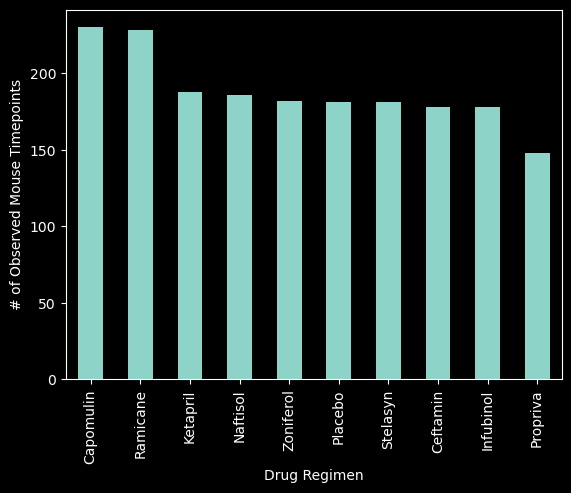

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
pandas_plotting = cleaned_df.groupby(['Drug Regimen'])['Timepoint'].count().sort_values(ascending=False)
plot = pandas_plotting.plot(kind='bar', width=0.5)
plot.set_xlabel('Drug Regimen')
plot.set_ylabel('# of Observed Mouse Timepoints')
plt.show()

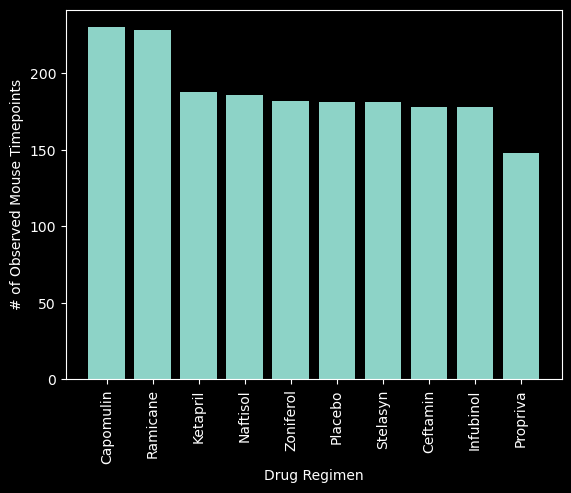

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis_pyplot = cleaned_df.groupby(['Drug Regimen'])['Timepoint'].count().sort_values(ascending=False).index
y_axis_pyplot = cleaned_df.groupby(['Drug Regimen'])['Timepoint'].count().sort_values(ascending=False)
plt.bar(x_axis_pyplot, y_axis_pyplot, width=.8)
plt.xlabel('Drug Regimen')
plt.xticks(rotation=90)
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

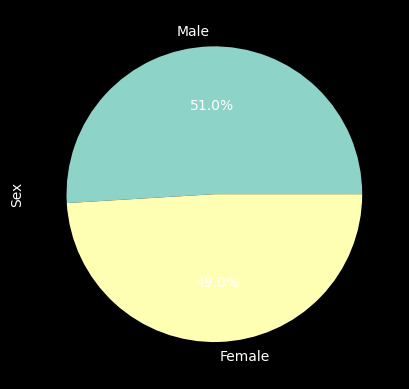

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
male_female = cleaned_df.groupby(['Sex'])['Mouse ID'].count().sort_values(ascending=False)
plot = male_female.plot(kind='pie', ylabel='Sex', autopct='%1.1f%%')
plt.show()

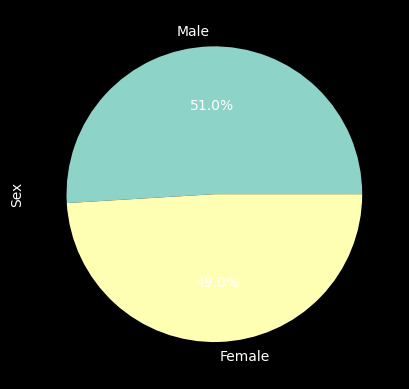

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = male_female.index
sizes = [count for count in male_female]
plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
four_treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
four_treatments_df = cleaned_df[(cleaned_df['Drug Regimen'].isin(four_treatments))]
last_timepoint_per_mouse = four_treatments_df.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
timepoint_merged = pd.merge(last_timepoint_per_mouse, merged_df, on='Mouse ID')
final_df = timepoint_merged[timepoint_merged['Timepoint_x'] == timepoint_merged['Timepoint_y']]
final_df = final_df.rename(columns={'Timepoint_x': 'Timepoint'})
final_df.drop(columns=['Timepoint_y'], inplace=True)


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
four_treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for drug in four_treatments:
    tumor_data = final_df[final_df['Drug Regimen'] == drug]['Tumor Volume (mm3)']
    
    quartiles = tumor_data.quantile([.25, .75])
    upperq = quartiles[.75]
    lowerq = quartiles[.25] 
    iqr =  upperq - lowerq
    upper_bound = upperq + (1.5 * iqr)
    lower_bound = lowerq - (1.5 * iqr)
    
    tumor_volume_data.append(tumor_data.to_list())
    # Determine outliers using upper and lower bounds
    outliers = tumor_data[(tumor_data < lower_bound) | (tumor_data > upper_bound)].values
    if len(outliers) == 1:
        print(f"{drug}'s potential outlier(s): {outliers[0]}")
    else:
        print(f"{drug}'s potential outlier(s): N/A")



Capomulin's potential outlier(s): N/A
Ramicane's potential outlier(s): N/A
Infubinol's potential outlier(s): 36.3213458
Ceftamin's potential outlier(s): N/A


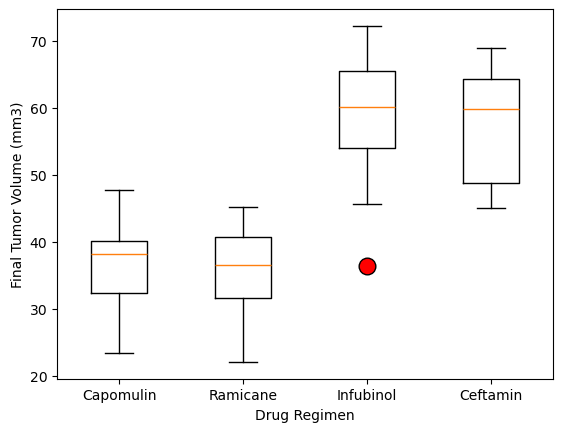

In [25]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_volume_data, labels=four_treatments, flierprops={'markerfacecolor':'r', 'markersize': 12})
plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

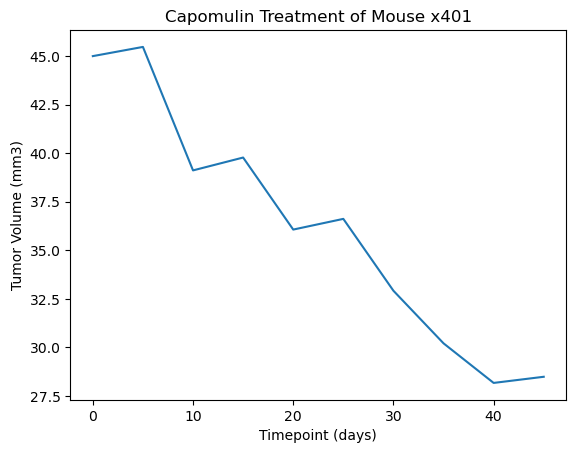

In [26]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df = cleaned_df[cleaned_df['Drug Regimen'] == 'Capomulin']
mouse_id = capomulin_df['Mouse ID'].iloc[5]
mouse_data = capomulin_df[capomulin_df['Mouse ID'] == mouse_id]
x_axis_mouse = mouse_data['Timepoint']
y_axis_mouse = mouse_data['Tumor Volume (mm3)']
plt.plot(x_axis_mouse, y_axis_mouse)
plt.title(f"Capomulin Treatment of Mouse {mouse_id}")
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

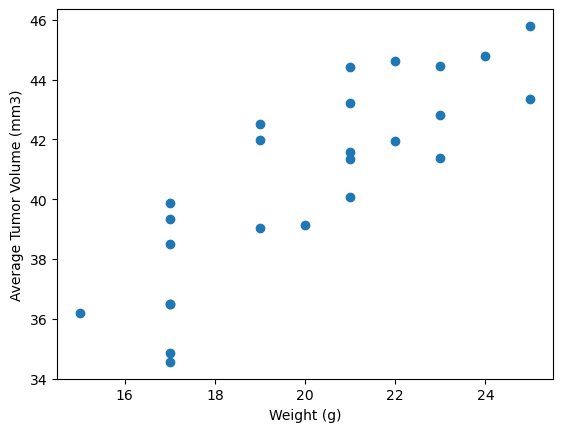

In [27]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
avg_weight = capomulin_df.groupby(['Mouse ID'])['Weight (g)'].first()
avg_tumor_vol = capomulin_df.groupby(['Mouse ID'])['Tumor Volume (mm3)'].mean()
x_axis_scatter = avg_weight
y_axis_scatter = avg_tumor_vol
plt.scatter(x_axis_scatter, y_axis_scatter)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


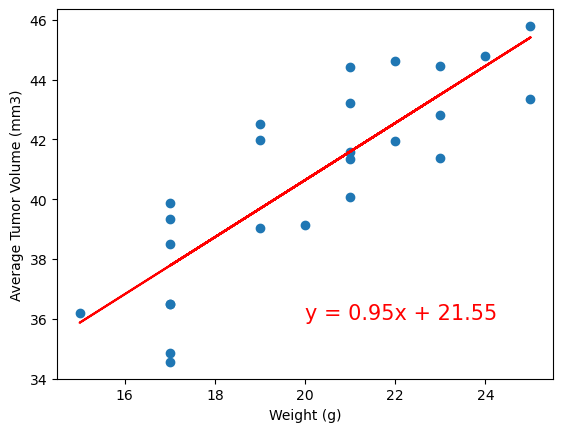

In [28]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation = st.pearsonr(avg_weight,avg_tumor_vol)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(avg_weight, avg_tumor_vol)
regress_values = avg_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis_scatter, y_axis_scatter)
plt.plot(avg_weight,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()